Name:K.Nivetha
Roll No:235229120

## Pizza Liking Prediction using KNN

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
pizza = pd.read_csv("pizza.csv")
pizza.head()

,age,weight,likePizza
0,50,65,0
1,20,55,1
2,15,40,1
3,70,65,0
4,30,70,1


In [9]:
pizza.shape

(6, 3)

In [10]:
pizza.columns

Index(['age', 'weight', 'likePizza'], dtype='object')

In [11]:
pizza.info

<bound method DataFrame.info of    age  weight  likePizza
0   50      65          0
1   20      55          1
2   15      40          1
3   70      65          0
4   30      70          1
5   75      60          0>

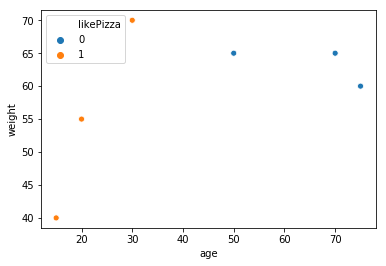

In [12]:
sns.scatterplot(x=pizza['age'], y=pizza['weight'], hue=pizza['likePizza'])

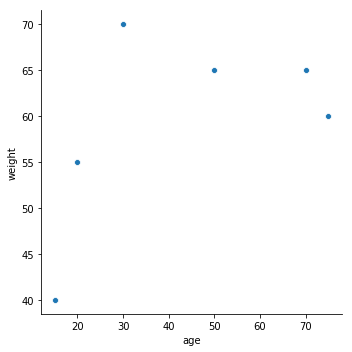

In [13]:
sns.relplot(x='age',y='weight',data=pizza,kind='scatter');

In [14]:
Fix = ["age","weight"]
x = pizza[Fix]

In [15]:
x

,age,weight
0,50,65
1,20,55
2,15,40
3,70,65
4,30,70
5,75,60


In [16]:
y = pizza.likePizza

In [17]:
y

0    0
1    1
2    1
3    0
4    1
5    0
Name: likePizza, dtype: int64

In [18]:
type(x)

pandas.core.frame.DataFrame

In [19]:
x.dtypes

age       int64
weight    int64
dtype: object

In [20]:
type(y)

pandas.core.series.Series

In [21]:
y.dtypes

dtype('int64')

In [22]:
piz_eat = KNeighborsClassifier(n_neighbors=2)

In [23]:
piz_eat.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [24]:
piz_eat.predict(x)

array([0, 1, 1, 0, 1, 0], dtype=int64)

In [25]:
pre = [[25,50]]
print(piz_eat.predict(pre))

[1]


In [26]:
pre =[[60,60]]
print(piz_eat.predict(pre))

[0]


In [27]:
piz_eat1 = KNeighborsClassifier(n_neighbors=3)
piz_eat1.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
pre = [[25,50]]
print(piz_eat1.predict(pre))

[1]


In [29]:
pre = [[60,60]]
print(piz_eat1.predict(pre))


[0]


In [30]:
y_pred = piz_eat.predict
(x)

,age,weight
0,50,65
1,20,55
2,15,40
3,70,65
4,30,70
5,75,60


In [31]:
def accuracy(actual, pred):
    return sum(actual == pred) / float(actual.shape[0])


In [32]:
accuracy(y,y_pred)

0.0

In [34]:
pizza1 = pd.read_csv("pizza_test.csv")

In [35]:
pizza1.head()

,age,weight,likePizza
0,48,68,1
1,35,45,1
2,15,40,0
3,55,65,0


In [36]:
pizza1.shape

(4, 3)

In [37]:
pizza1.columns

Index(['age', 'weight', 'likePizza'], dtype='object')

In [38]:
pizza1.info

<bound method DataFrame.info of    age  weight  likePizza
0   48      68          1
1   35      45          1
2   15      40          0
3   55      65          0>

In [39]:
Fix = ["age","weight"]
x = pizza1[Fix]


In [40]:
x

,age,weight
0,48,68
1,35,45
2,15,40
3,55,65


In [41]:
y = pizza1.likePizza

In [42]:
y

0    1
1    1
2    0
3    0
Name: likePizza, dtype: int64

In [43]:
pizza_eat = KNeighborsClassifier(n_neighbors=2)

In [44]:
pizza_eat.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [45]:
pizza_eat.predict(x)

array([0, 0, 0, 0], dtype=int64)

In [46]:
def accuracy(actual, pred):
    return sum(actual == pred) / (float(actual.shape[0]))


In [47]:
y_pred = pizza_eat.predict(x)

In [48]:
accuracy(y,y_pred)

0.5

In [49]:
scores = []

for k in range(1,4):
    best = KNeighborsClassifier(n_neighbors=k)
    best.fit(x,y)
    y_pred = best.predict(x)
    acc = accuracy(y,y_pred)
    scores.append((k, acc))
    

In [50]:
scores

[(1, 1.0), (2, 0.5), (3, 0.5)]

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y,y_pred)

0.5